# Analyse Sondage Intercommunalités

## Sommaire
* [Importation des modules](#importation-des-modules)
* [Importation des données](#importation-des-données)
* [Analyse des données](#analyse-des-données)
    * [Nombre de réponses par age](#nombre-de-réponses-par-age)
    * [Categorie d'aliment et le nombre d'appartion dans le sondage](#categorie-d'aliment-et-le-nombre-d'appartion-dans-le-sondage)
    * [Nombre de sondage effectué en fonction de la date](#nombre-de-sondage-effectué-en-fonction-de-la-date)
    * [Nuage de point entre le nombre d'aliment le matin et le soir par sondage](#nuage-de-point-entre-le-nombre-d'aliment-le-matin-et-le-soir-par-sondage)

## Importation des modules



In [25]:
from database.database import getDatabase, getVilles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [26]:
villes = getVilles()
database = getDatabase()

In [27]:
framedatabase = {}
for table in database:
    framedatabase[table] = pd.DataFrame(database[table])

In [28]:
nameOfTable = list(framedatabase.keys())

## Analyse des données

* ### Nombre de réponses par age

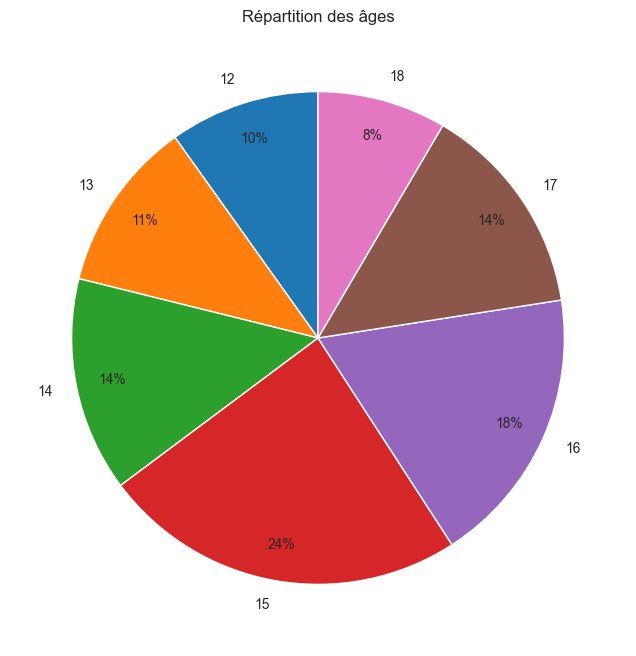

In [29]:
sondagePersonnes = pd.merge(framedatabase['Sondage'], framedatabase['Personne'], left_on='idPersonne', right_on='id')
result = sondagePersonnes.groupby('age')['age'].count()
labels = result.index.tolist()
values = result.values.tolist()

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.title("Répartition des âges")

plt.pie(values, labels=labels, autopct='%.0f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)
plt.show()

* ### Categorie d'aliment et le nombre d'appartion dans le sondage

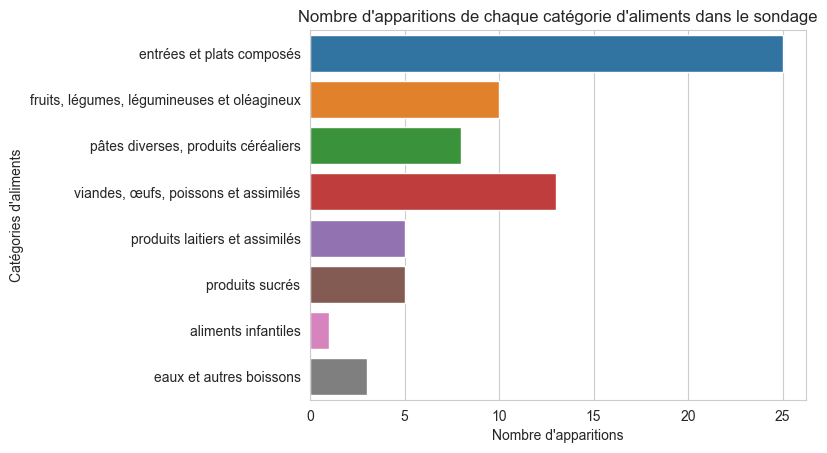

In [30]:
sondageCategorie = framedatabase['Sondage'].copy()
aliments = ['alimentMatin1', 'alimentMatin2', 'alimentMatin3', 'alimentMatin4', 'alimentMatin5', 'alimentSoir1', 'alimentSoir2', 'alimentSoir3', 'alimentSoir4', 'alimentSoir5']
for i in aliments:
    df = framedatabase['Aliment'].loc[:, ['alim_code', 'alim_ssssgrp_code']]
    df = df.rename(columns={'alim_code': 'alim_code_'+i, 'alim_ssssgrp_code': 'alim_ssssgrp_code_'+i})
    sondageCategorie = pd.merge(sondageCategorie, df, left_on=i, right_on='alim_code_'+i)

    df = framedatabase['SousSousGroupeAliment'].loc[:, ['alim_ssssgrp_code', 'alim_ssgrp_code']]
    df = df.rename(columns={'alim_ssssgrp_code': 'alim_ssssgrp_code_'+i, 'alim_ssgrp_code': 'alim_ssgrp_code_'+i})
    sondageCategorie = pd.merge(sondageCategorie, df, left_on='alim_ssssgrp_code_'+i, right_on='alim_ssssgrp_code_'+i)

    df = framedatabase['SousGroupeAliment'].loc[:, ['alim_ssgrp_code', 'idGroupeAliment']]
    df = df.rename(columns={'alim_ssgrp_code': 'alim_ssgrp_code_'+i, 'idGroupeAliment': 'idGroupeAliment_'+i})
    sondageCategorie = pd.merge(sondageCategorie, df, left_on='alim_ssgrp_code_'+i, right_on='alim_ssgrp_code_'+i)

    df = framedatabase['GroupeAliment'].loc[:, ['alim_grp_code', 'alim_grp_nom_fr']]
    df = df.rename(columns={'alim_grp_code': 'alim_grp_code_'+i, 'alim_grp_nom_fr': 'alim_grp_nom_fr_'+i})
    sondageCategorie = pd.merge(sondageCategorie, df, left_on='idGroupeAliment_'+i, right_on='alim_grp_code_'+i)
    sondageCategorie.drop(columns=['alim_code_'+i, 'alim_ssssgrp_code_'+i, 'alim_ssgrp_code_'+i, 'idGroupeAliment_'+i], inplace=True)

# etc. pour chaque aliment
# Fusionner toutes les colonnes d'aliments en une seule colonne
aliments_concat = pd.concat([sondageCategorie[col] for col in sondageCategorie.columns if 'alim_grp_nom_fr' in col])

# Créer le graphique avec countplot
sns.countplot(y=aliments_concat)

# Ajouter des étiquettes et un titre
plt.xlabel('Nombre d\'apparitions')
plt.ylabel('Catégories d\'aliments')
plt.title('Nombre d\'apparitions de chaque catégorie d\'aliments dans le sondage')
plt.show()

* ### Nombre de sondage effectué en fonction de la date

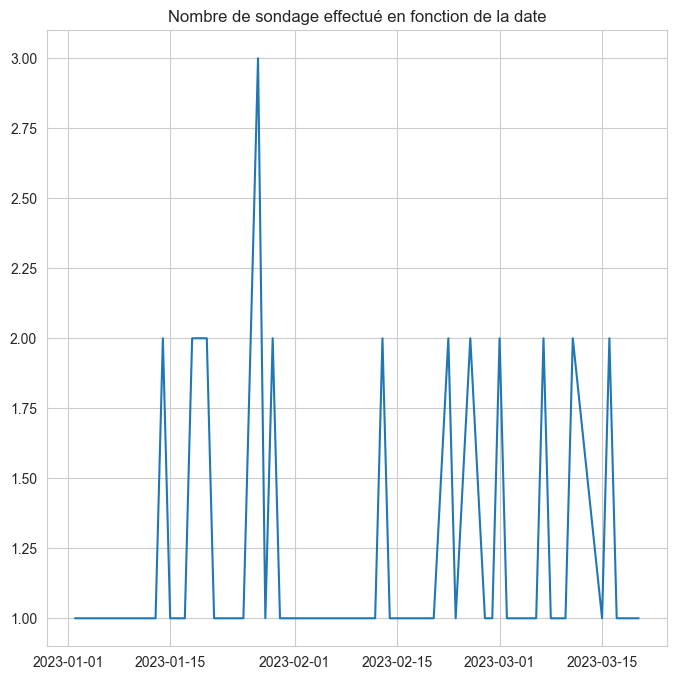

In [31]:
sondageDate = framedatabase['Sondage'].copy()
sondageDate['date'] = pd.to_datetime(sondageDate['date'])
sondageDate['date'] = sondageDate['date'].dt.date
sondageDate = sondageDate.groupby('date')['date'].count()
sondageDate = sondageDate.reset_index(name='count')
sondageDate = sondageDate.sort_values(by=['date'])
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.title("Nombre de sondage effectué en fonction de la date")
plt.plot(sondageDate['date'], sondageDate['count'])
plt.show()

* ### Nuage de point entre le nombre d'aliment le matin et le soir par sondage

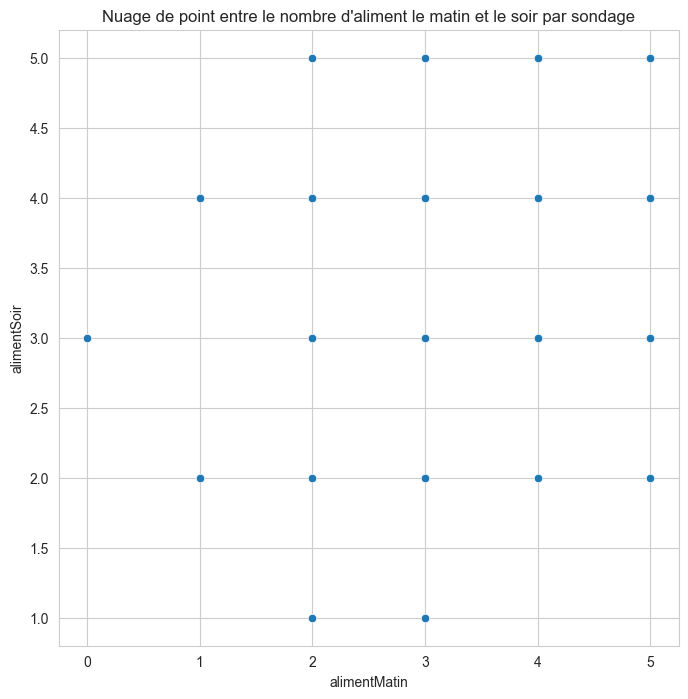

In [32]:
sondageAliment = framedatabase['Sondage'].copy()
sondageAliment['alimentMatin'] = sondageAliment['alimentMatin1'].notnull().astype('int') + sondageAliment['alimentMatin2'].notnull().astype('int') + sondageAliment['alimentMatin3'].notnull().astype('int') + sondageAliment['alimentMatin4'].notnull().astype('int') + sondageAliment['alimentMatin5'].notnull().astype('int')
sondageAliment['alimentSoir'] = sondageAliment['alimentSoir1'].notnull().astype('int') + sondageAliment['alimentSoir2'].notnull().astype('int') + sondageAliment['alimentSoir3'].notnull().astype('int') + sondageAliment['alimentSoir4'].notnull().astype('int') + sondageAliment['alimentSoir5'].notnull().astype('int')
sondageAliment = sondageAliment[['alimentMatin', 'alimentSoir']]
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.title("Nuage de point entre le nombre d'aliment le matin et le soir par sondage")
sns.scatterplot(x='alimentMatin', y='alimentSoir', data=sondageAliment)
plt.show()

* ### Implot entre le nombre d'aliment le matin et le soir par StatutScolaire par sondage

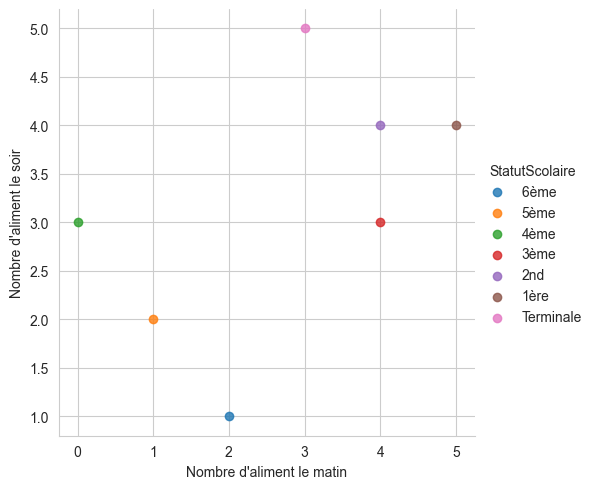

In [33]:
sondageAliment = framedatabase['Sondage'].copy()
sondageAliment['alimentMatin'] = sondageAliment['alimentMatin1'].notnull().astype('int') + sondageAliment['alimentMatin2'].notnull().astype('int') + sondageAliment['alimentMatin3'].notnull().astype('int') + sondageAliment['alimentMatin4'].notnull().astype('int') + sondageAliment['alimentMatin5'].notnull().astype('int')
sondageAliment['alimentSoir'] = sondageAliment['alimentSoir1'].notnull().astype('int') + sondageAliment['alimentSoir2'].notnull().astype('int') + sondageAliment['alimentSoir3'].notnull().astype('int') + sondageAliment['alimentSoir4'].notnull().astype('int') + sondageAliment['alimentSoir5'].notnull().astype('int')
sondageAliment['StatutScolaire'] = framedatabase['StatutScolaire'].loc[:, 'NiveauScolaire']
sondageAliment = sondageAliment[['alimentMatin', 'alimentSoir', 'StatutScolaire']]
g = sns.lmplot(x='alimentMatin', y='alimentSoir', hue='StatutScolaire', data=sondageAliment)
g.set_axis_labels("Nombre d'aliment le matin", "Nombre d'aliment le soir")
plt.show()